# Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Column 1: age in years
# Column 2: 1 = male, 0 = female
# Column 3: 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic
# Column 4: resting blood pressure in mmHg
# Column 5: cholesterol in mg/dl
# Column 6: 1 means > 120 mg/dl, 0 means <= 120 mg/dl
# Column 7: resting electrocardiographic, 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
# Column 8: max heart rate achieved
# Column 9: 1 = yes, 2 = no
# Column 10: ST depression induced by exercise relative to rest
# Column 11: slope of the peak exercise ST segment, 1 = upsloping, 2 = flat, 3 = downsloping
# Column 12: number of major vessels (0-3) colored by flourosopy
# Column 13: 3 = normal, 6 = fixed defect, 7 = reversable defect
# Column 14: >=1 means heart disease, 0 = no heart disease

myNames = ["age", # column 1
        "sex", # col 2
        "chestPainType", # col 3
        "restingBP", # col 4
        "serumCholesterol", # col 5
        "fastingBloodSugar", # col 6
        "restingEcg", # col 7
        "maxHeartRate", # col 8
        "exerciseInducedAngina", # col 9
        "stDepression", # col 10
        "stSlope", # col 11
        "majorVessels", # col 12
        "thalassemia", # col 13
        "diagnosis"] # col 14
assert len(myNames) == 14

data=pd.read_csv("data/processed.cleveland.data", sep=',', names=myNames, na_values=["?", '?'])
data = data.dropna() # Drop rows with missing data
data.iloc[:, -1] = data.iloc[:, -1].clip(0, 1) # clip last column (output) between 0 and 1, both inclusive

# Convert all columns to float
for name in myNames:
    data[name] = pd.to_numeric(data[name],errors = 'coerce')

m = data.shape[0] # num examples
n = data.shape[1] - 1 # num features

print("Num features:", n)
print("Num examples:", m)
    
# a few examples from the dataset 
print()
print(data.head())

X = data.values[:, :-1]
y = data.values[:, -1:]



categoricalColumnsNames = ["sex", 
                      "chestPainType", 
                      "fastingBloodSugar", 
                      "restingEcg", 
                      "exerciseInducedAngina", 
                      "stSlope",
                      "majorVessels",
                      "thalassemia"]
continuousColumns = data.drop(categoricalColumnsNames, axis=1)
continuousColumnsNames = [name for name in myNames if name not in categoricalColumnsNames and name != "diagnosis"]
categoricalColumns = data.drop(continuousColumnsNames, axis=1)
if "diagnosis" in continuousColumns:
    continuousColumns = continuousColumns.drop("diagnosis", axis=1)
if "diagnosis" not in categoricalColumns:
    categoricalColumns = data["diagnosis"]


Num features: 13
Num examples: 297

    age  sex  chestPainType  restingBP  serumCholesterol  fastingBloodSugar  \
0  63.0  1.0            1.0      145.0             233.0                1.0   
1  67.0  1.0            4.0      160.0             286.0                0.0   
2  67.0  1.0            4.0      120.0             229.0                0.0   
3  37.0  1.0            3.0      130.0             250.0                0.0   
4  41.0  0.0            2.0      130.0             204.0                0.0   

   restingEcg  maxHeartRate  exerciseInducedAngina  stDepression  stSlope  \
0         2.0         150.0                    0.0           2.3      3.0   
1         2.0         108.0                    1.0           1.5      2.0   
2         2.0         129.0                    1.0           2.6      2.0   
3         0.0         187.0                    0.0           3.5      3.0   
4         2.0         172.0                    0.0           1.4      1.0   

   majorVessels  thalassem

Output=1 (has heart disease): 46% (137/297)
Output=0 (no heart disease): 54% (160/297)


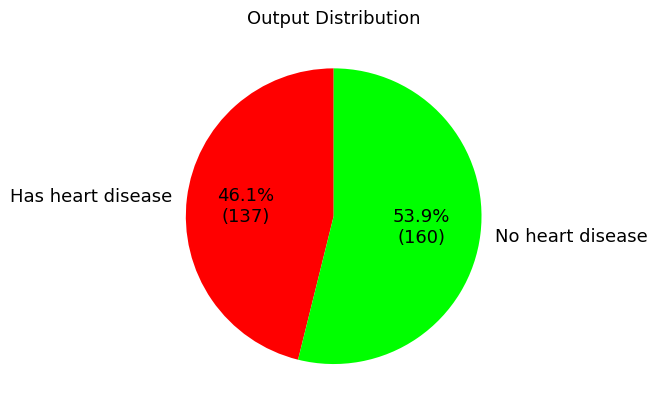

In [3]:
# Output distribution
output = data.values[:, -1]
numHeartDisease = np.count_nonzero(output == 1)
percentageHeartDisease = numHeartDisease / len(output) * 100
print(f"Output=1 (has heart disease): {round(percentageHeartDisease)}% ({numHeartDisease}/{output.shape[0]})")
numNoDisease = output.shape[0] - numHeartDisease
percentageNoDisease = 100 - percentageHeartDisease
print(f"Output=0 (no heart disease): {round(percentageNoDisease)}% ({numNoDisease}/{output.shape[0]})")

labels = ['Has heart disease', 'No heart disease']
sizes = [numHeartDisease, numNoDisease]
colors = ['#ff0000', '#00ff00']

def autopct_format(pct, sizes):
    idx = int(pct/100. * len(sizes))
    return '{:.1f}%\n({:d})'.format(pct, sizes[idx]).strip()

plt.pie(sizes, 
        colors=colors, 
        labels=labels, 
        autopct=lambda pct: autopct_format(pct, sizes), 
        startangle=90,
        textprops={'fontsize': 13})

plt.title('Output Distribution', fontsize=13)
plt.show()

In [ ]:
# Gender distribution
gender = data.values[:, 1]
maleCount = np.count_nonzero(gender == 1)
percentageMales = maleCount / len(gender) * 100
print(f"Males: {round(percentageMales)}% ({maleCount}/{gender.shape[0]})")
femaleCount = gender.shape[0] - maleCount
percentageFemales = 100 - percentageMales
print(f"Females: {round(percentageFemales)}% ({femaleCount}/{gender.shape[0]})")

labels = ['Female', 'Male']
sizes = [femaleCount, maleCount]
colors = ['#ff9999', '#66b3ff']

def autopct_format(pct, sizes):
    idx = int(pct/100. * len(sizes))
    return '{:.1f}%\n({:d})'.format(pct, sizes[idx]).strip()

plt.pie(sizes, 
        colors=colors, 
        labels=labels, 
        autopct=lambda pct: autopct_format(pct, sizes), 
        startangle=90,
        textprops={'fontsize': 13})

plt.title('Gender Distribution', fontsize=13)
plt.show()

In [ ]:
# Ages distribution
bins = range(20, 90, 5) # Define 5 year intervals (last arg) from 20 to 85
plt.hist(data.values[:,0], bins=bins, edgecolor="black")
plt.xlabel("Age in years")
plt.ylabel("Num people")
plt.xticks(bins)
plt.title("Ages distribution")
plt.show()

# Categorical features (individual)

In [ ]:
# Bar chart for each categorical feature

# Set the style of the plots
sns.set(style='whitegrid')

num_cols = len(categoricalColumns.columns)
num_rows = (num_cols + 1) // 2
fig, axes = plt.subplots(nrows=num_rows-1, ncols=2, figsize=(12, 6*(num_rows-1)))  # Update the number of rows and figsize
myPalette = {0:"green", 1:"red"}

for i in range(num_rows-1):  # Update the number of rows to loop through
    for j in range(2):
        if 2*i + j < num_cols:
            col = categoricalColumns.columns[2*i + j]
            sns.countplot(x=col, hue='diagnosis', data=data, ax=axes[i, j], palette=myPalette)
            axes[i, j].set_xlabel(col, fontsize=20)
            axes[i, j].set_ylabel('Count', fontsize=20)
            axes[i, j].tick_params(axis='both', which='major', labelsize=18)
            xticks, xticklabels = plt.xticks()
            plt.xticks(xticks, xticklabels, fontsize=18)
            leg = axes[i, j].legend(fontsize=18)  # increase font size of legend
            leg.set_title('Diagnosis', prop={'size': 18})  # increase font size of legend title
    
plt.tight_layout()
plt.show()

# Numeric features (individual)

In [ ]:
# Plot for each continuous feature

# Calculate the number of rows and columns needed to fit all the plots
n_cols = 2
n_rows = (len(continuousColumns) + 1) // 2  # Round up if necessary
my_palette = {0: "green", 1: "red"}

# Create a subplot grid with the specified number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 500))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# Iterate over the continuous columns and create a histogram for each one
for i, col in enumerate(continuousColumnsNames):
    sns.histplot(data=data, 
                 x=col, 
                 hue='diagnosis', 
                 kde=True, 
                 multiple='stack', 
                 alpha=0.7, 
                 palette=my_palette, 
                 ax=axes[i])
    #axes[i].set_title(col)
    axes[i].set_xlabel(col, fontsize=18)
    axes[i].set_ylabel('Count', fontsize=18)
    axes[i].tick_params(axis='both', which='major', labelsize=15)
    xticks, xticklabels = plt.xticks()
    plt.xticks(xticks, xticklabels, fontsize=15)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
    
# Show the plots
plt.tight_layout()
plt.show()

# Each feature vs each feature analysis

**Continuous feature vs continuous feature**

In [ ]:
# Scatter matrix (used for continuous features)

# In last column, replace 0's by "No heart disesase" and 1's by "Heart disease"
continuousColumnsWithOutput = continuousColumns.copy()
continuousColumnsWithOutput["diagnosis"] = data["diagnosis"]
dictReplace = {0: "No heart disease", 1: "Heart disease"}
continuousColumnsWithOutput["diagnosis"] = continuousColumnsWithOutput["diagnosis"].replace(dictReplace)

sns.set(font_scale=1.25)
myPalette = {"No heart disease":"green", "Heart disease":"red"}
matrix = sns.pairplot(
    continuousColumnsWithOutput, 
    hue="diagnosis", 
    palette=myPalette,
    diag_kws={'legend': False})
matrix._legend.remove()
plt.show()
sns.set(font_scale=1)

In [ ]:
# Correlation heatmap (used for continuous features)
plt.figure(figsize=(4, 4))
sns.heatmap(continuousColumns.corr(), cmap='Blues', annot=True, fmt=".2f")
plt.title("Correlation heatmap for continuous features")
plt.show()

**Continuous feature vs categorical feature**

In [ ]:
# Box plot matrix (continuous feature vs categorical feature)
def makeBoxMatrix(argCategoricalColumns):
    # Create a figure and axes for the subplots
    num_continuous = len(continuousColumns.columns)
    num_categorical = len(argCategoricalColumns.columns)
    fig, axes = plt.subplots(num_continuous,
                             num_categorical,
                             figsize=(3*num_categorical, 3*num_continuous),
                             sharex=False,
                             sharey='row')
    myPalette = {0:"green", 1:"red"}
    
    # Loop over each pair of continuous and categorical columns and create a box plot
    for i, cont_col in enumerate(continuousColumns.columns):
        for j, cat_col in enumerate(argCategoricalColumns.columns):
            sns.boxplot(x=cat_col, y=cont_col, data=data, ax=axes[i, j], hue='diagnosis', palette=myPalette)
            """
            if i == num_continuous - 1:
                axes[i, j].set_xlabel(cat_col)
            else:
                axes[i, j].set_xlabel('')
            """
            axes[i, j].set_xlabel(cat_col)
            if j == 0:
                axes[i, j].set_ylabel(cont_col)
            else:
                axes[i, j].set_ylabel('')

    plt.tight_layout()
    plt.show()

makeBoxMatrix(categoricalColumns.iloc[:, :3])
makeBoxMatrix(categoricalColumns.iloc[:, 3:6])
makeBoxMatrix(categoricalColumns.iloc[:, 6:])

In [ ]:
# Correlation heatmap between continuous and categorical features

from scipy.stats import pointbiserialr

# Initialize a dataframe to store the correlation coefficients
corr_matrix = pd.DataFrame(index=categoricalColumns.columns, columns=continuousColumns.columns)

# Compute the correlation coefficients
for categorical_feature in categoricalColumns.columns:
    for continuous_feature in continuousColumns.columns:
        corr, pvalue = pointbiserialr(categoricalColumns[categorical_feature], continuousColumns[continuous_feature])
        corr_matrix.loc[categorical_feature, continuous_feature] = corr
        
# Convert the correlation matrix to a numeric datatype
corr_matrix = corr_matrix.astype(float)

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

plt.title("Point-biserial correlation heatmap between categorical and continuous features")
plt.show()

**Categorical feature vs categorical feature**

In [ ]:
# Heatmap for each categorical feature vs each categorical feature
# Number in cell is how many diagnosis=1

data['diagnosis_binary'] = (data['diagnosis'] == 1).astype(int)
sns.set(font_scale=1.25)

# 8 categorical features choose 2 = 28, we will have 28 plots
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(10,25))
#fig.subplots_adjust(hspace=5) # Add space between subplots
currentRow = 0
currentCol = 0
for i, col1 in enumerate(categoricalColumnsNames):
    for j, col2 in enumerate(categoricalColumnsNames):
        if i < j:            
            pivot_table = pd.pivot_table(data, 
                                         values='diagnosis_binary', 
                                         index=col1, 
                                         columns=col2,
                                         aggfunc=sum,
                                         fill_value=0)
            
            # Plot the pivot table as a heatmap matrix
            sns.heatmap(pivot_table, annot=True, fmt='g', 
                        cmap='RdYlGn_r', cbar=False, 
                        center=0, vmin=0, vmax=pivot_table.values.max(), 
                        ax=axes[currentRow, currentCol])
            
            axes[currentRow, currentCol].set_xlabel(col2)
            currentCol += 1
            if currentCol > 2:
                currentRow += 1
                currentCol = 0
                
fig.delaxes(axes[9,1])
fig.delaxes(axes[9,2])
plt.tight_layout() # fix space between plots
plt.show()
            
data = data.drop("diagnosis_binary",axis=1)
sns.set(font_scale=1)

In [ ]:
# Correlation heatmap for each pair of categorical features

from scipy.stats import chi2_contingency

categoricalColumns["diagnosis"] = data["diagnosis"]
corr_matrix = np.zeros((len(categoricalColumns.columns), len(categoricalColumns.columns)))
for i, feature1 in enumerate(categoricalColumns.columns):
    for j, feature2 in enumerate(categoricalColumns.columns):
        if i != j:
            contingency_table = pd.crosstab(categoricalColumns[feature1], categoricalColumns[feature2])
            chi2_stat, _, _, _ = chi2_contingency(contingency_table)
            n = contingency_table.sum().sum()
            corr_matrix[i, j] = np.sqrt(chi2_stat / (n * min(contingency_table.shape) - 1))

# Plot correlation heatmap
sns.heatmap(corr_matrix, xticklabels=categoricalColumns.columns, yticklabels=categoricalColumns.columns, cmap='Blues', annot=True, fmt='.2f')
plt.title("Correlation heatmap for categorical features using Cramer's V measure")
plt.show()
categoricalColumns = categoricalColumns.drop("diagnosis", axis=1)